In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB # Using Gaussian Naive Bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set plot style for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [3]:
# Load the dataset
file_path = 'Dataset_Model_Preprocessed.csv'
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print("Shape of the dataset:", df.shape)
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: '{file_path}' not found.")
    # Create a dummy DataFrame for demonstration if file not found
    print("\nCreating a dummy dataset for demonstration purposes...")
    num_samples = 500
    ap_cols = [f'ap_{i}' for i in range(1, 44)]
    dummy_data = {}
    for col in ap_cols:
        dummy_data[col] = np.random.randint(-95, -30, num_samples)
        dummy_data[col][np.random.rand(num_samples) < 0.3] = np.nan # Introduce some NaNs
    dummy_data['spot'] = np.random.choice(['Lantai 1', 'Lantai 2', 'Lantai 3', 'Lantai 4'], num_samples)
    df = pd.DataFrame(dummy_data)
    print("Dummy dataset created.")
    print(df.head())

Dataset loaded successfully.
Shape of the dataset: (86, 44)

First 5 rows of the dataset:
   ap_1  ap_2  ap_3  ap_4  ap_5  ap_6  ap_7  ap_8  ap_9  ap_10  ...  ap_35  \
0 -37.0 -41.0   NaN   NaN   NaN   NaN -93.0   NaN -74.0    NaN  ...    NaN   
1 -68.0 -69.0   NaN -65.0   NaN -76.0   NaN -72.0 -79.0  -81.0  ...    NaN   
2 -53.0 -56.0   NaN -68.0   NaN -67.0 -82.0 -76.0 -76.0  -76.0  ...    NaN   
3 -69.0 -74.0 -62.0 -59.0 -87.0 -35.0 -49.0 -60.0 -75.0  -59.0  ...    NaN   
4 -63.0 -58.0   NaN -76.0   NaN -77.0   NaN   NaN -65.0  -85.0  ...    NaN   

   ap_36  ap_37  ap_38  ap_39  ap_40  ap_41  ap_42  ap_43      spot  
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  Lantai 1  
1    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  Lantai 1  
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN  Lantai 1  
3    NaN    NaN    NaN  -83.0    NaN    NaN    NaN    NaN  Lantai 1  
4    NaN  -80.0    NaN    NaN    NaN    NaN  -72.0    NaN  Lantai 1  

[5 rows x 44 columns

In [4]:
#Pra-pemrosesan Data

# Handle missing values: fill NaN with a placeholder (e.g., -100 for RSSI)
df.fillna(-100, inplace=True)

# Define features (X) and target (y)
X = df.drop('spot', axis=1)
y = df['spot']

# Encode the target variable 'spot' (categorical for classification)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
#Membangun dan Melatih Model Naive Bayes


# Initialize the Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Train the model
print("\nTraining Gaussian Naive Bayes model...")
gnb_model.fit(X_train_scaled, y_train)
print("Gaussian Naive Bayes model training complete.")


Training Gaussian Naive Bayes model...
Gaussian Naive Bayes model training complete.


In [6]:
#Evaluasi Model Naive Bayes

# Make predictions on the test set
y_pred_gnb = gnb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"\n--- Model Evaluation (Gaussian Naive Bayes) ---")
print(f"Model Accuracy: {accuracy_gnb:.4f}")

# Classification Report
print("\nClassification Report (Gaussian Naive Bayes):")
print(classification_report(y_test, y_pred_gnb, target_names=le.classes_))


--- Model Evaluation (Gaussian Naive Bayes) ---
Model Accuracy: 0.8182

Classification Report (Gaussian Naive Bayes):
              precision    recall  f1-score   support

    Lantai 1       0.69      1.00      0.82         9
    Lantai 2       1.00      0.25      0.40         4
    Lantai 3       1.00      1.00      1.00         4
    Lantai 4       1.00      0.80      0.89         5

    accuracy                           0.82        22
   macro avg       0.92      0.76      0.78        22
weighted avg       0.87      0.82      0.79        22



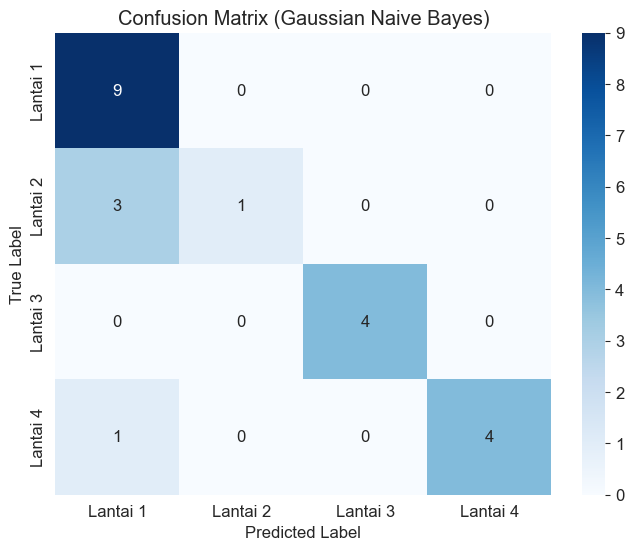

In [7]:
# Confusion Matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix (Gaussian Naive Bayes)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

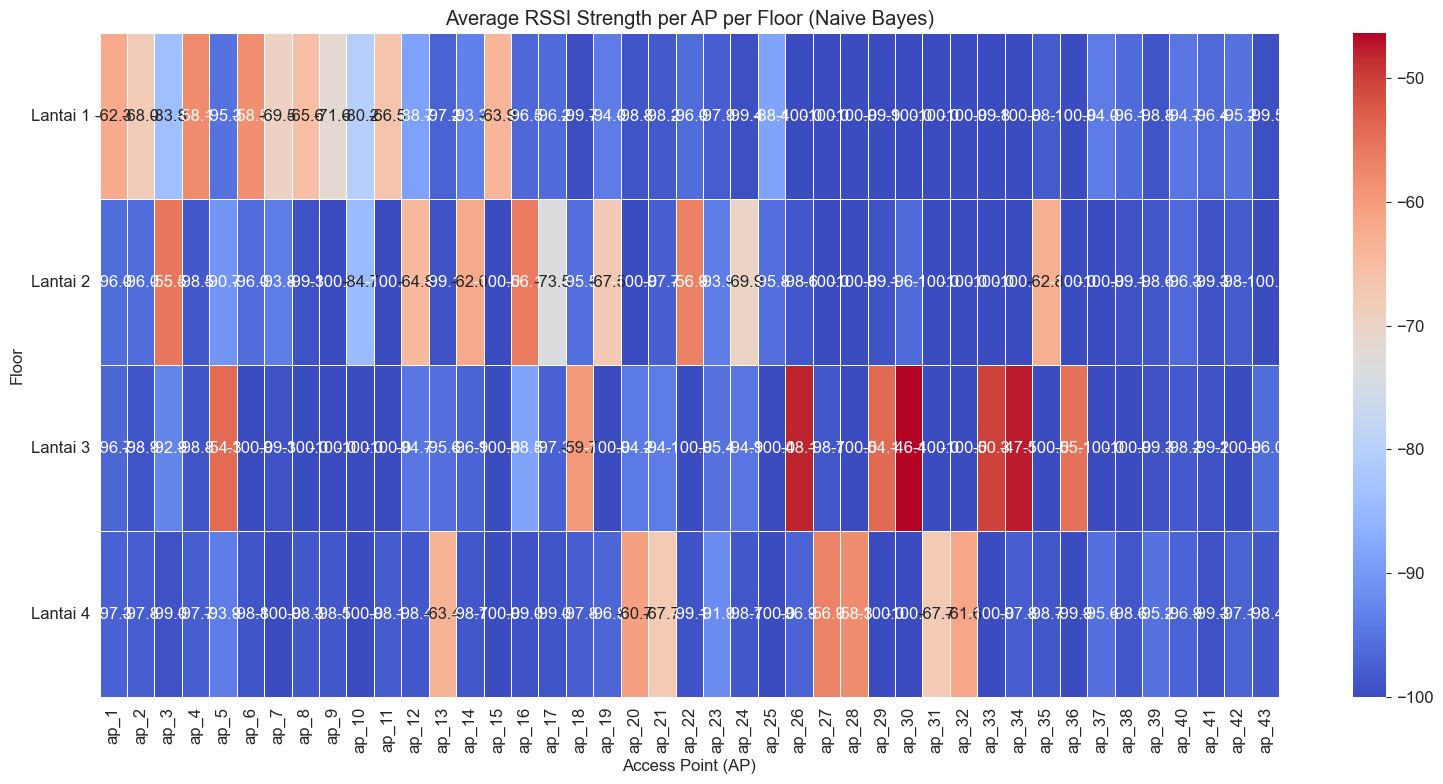

In [8]:
#Visualisasi Rata-rata Kekuatan Sinyal
# Calculate mean RSSI for each AP per floor
avg_rssi_per_floor = df.groupby('spot')[X.columns].mean()

plt.figure(figsize=(16, 8))
sns.heatmap(avg_rssi_per_floor, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average RSSI Strength per AP per Floor (Naive Bayes)')
plt.xlabel('Access Point (AP)')
plt.ylabel('Floor')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Top APs: Index(['Lantai 3', 'Lantai 2', 'Lantai 4', 'Lantai 1'], dtype='object', name='spot')
Most Variable APs: Index(['Lantai 3', 'Lantai 2', 'Lantai 4', 'Lantai 1'], dtype='object', name='spot')


C:\Users\Rifdatun Nafi'ah\AppData\Local\Temp\ipykernel_21120\168999209.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df.melt(id_vars=['spot'],


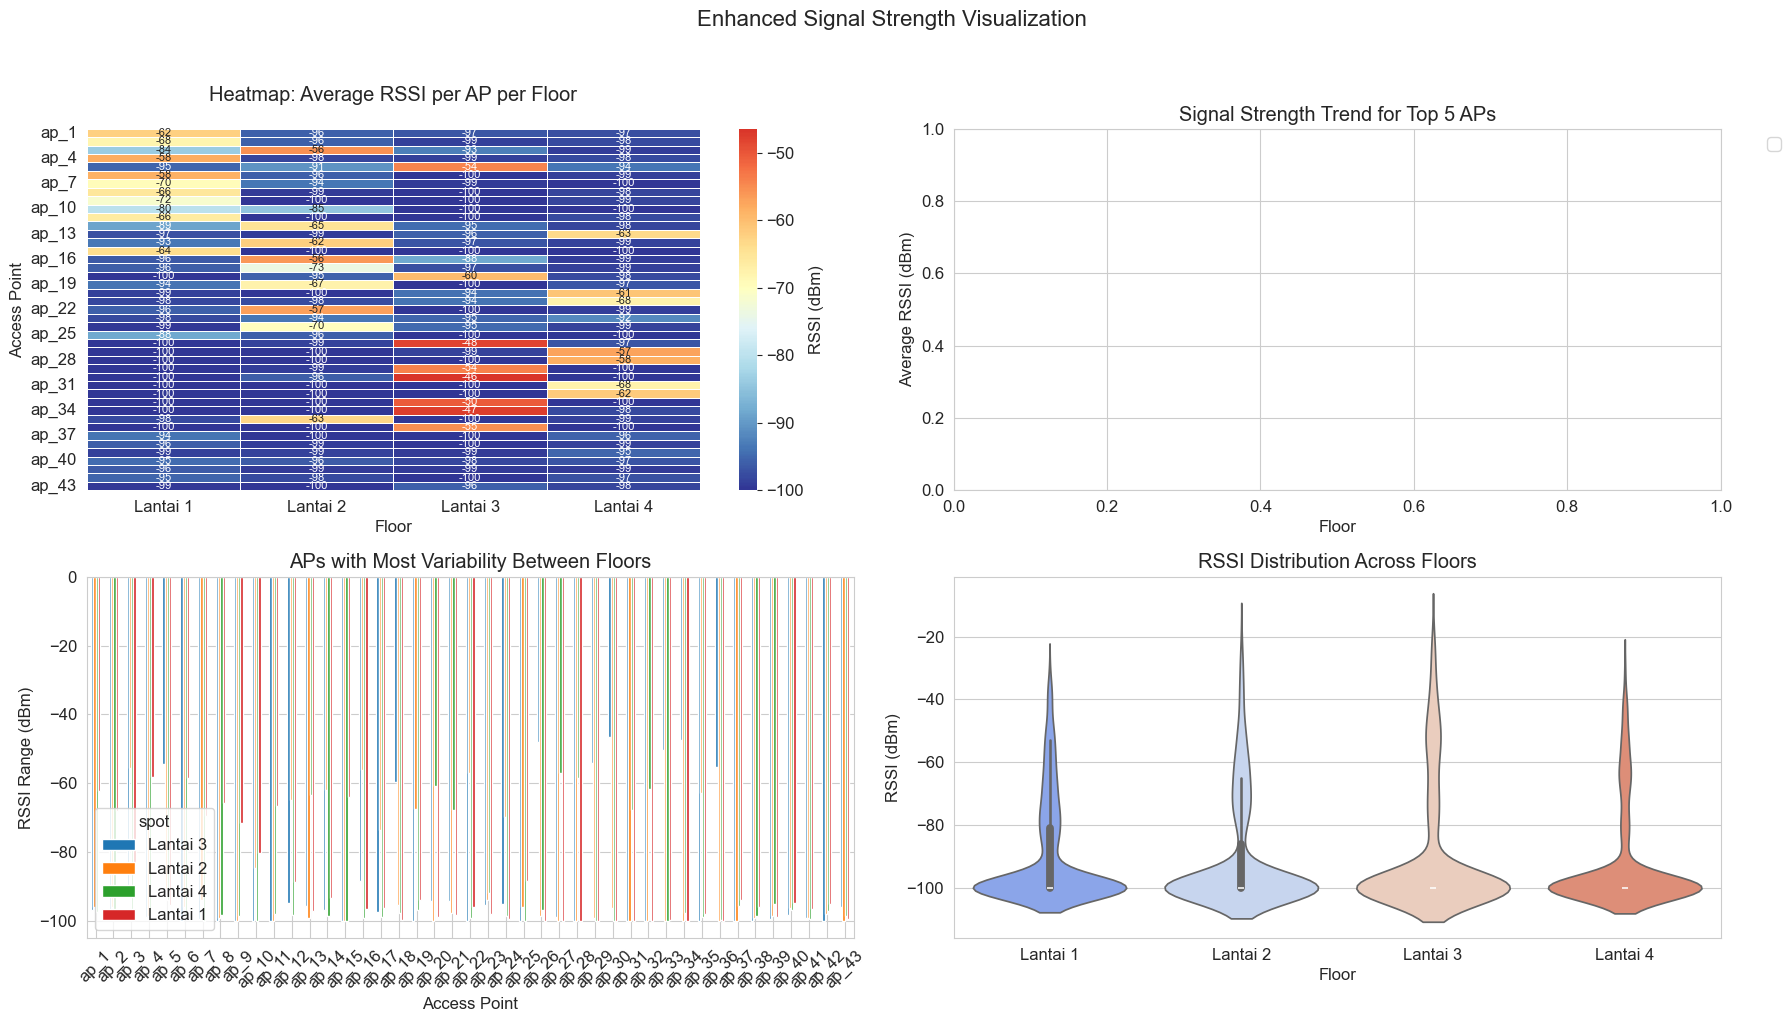

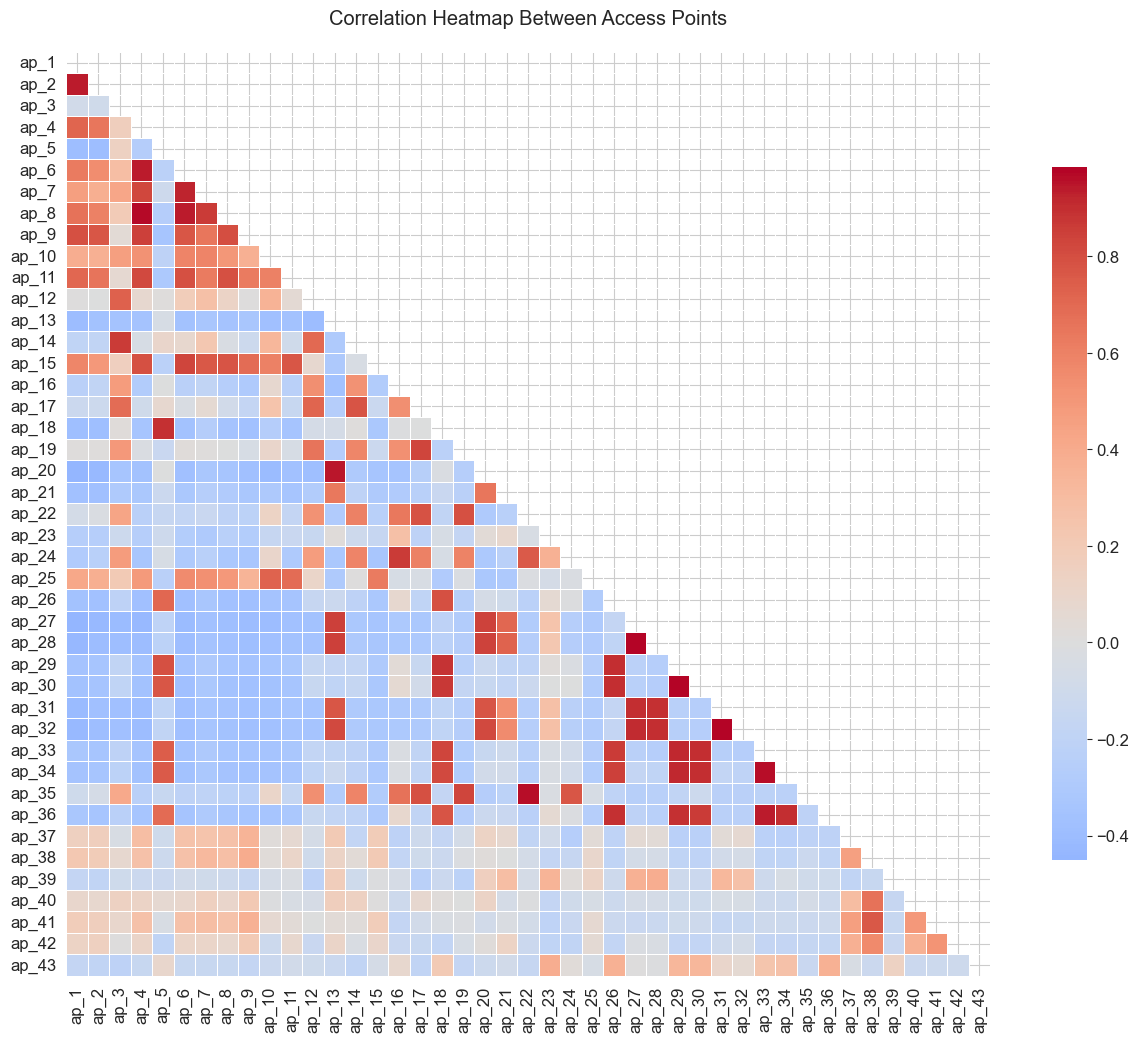

In [11]:
# Calculate mean RSSI for each AP per floor
avg_rssi_per_floor = df.groupby('spot')[X.columns].mean()

# Check for NaN values and drop them if necessary
avg_rssi_per_floor = avg_rssi_per_floor.dropna()

# Transpose untuk visualisasi yang lebih baik
avg_rssi_per_floor_T = avg_rssi_per_floor.T

plt.figure(figsize=(18, 10))
plt.suptitle('Enhanced Signal Strength Visualization', y=1.02, fontsize=16)

# Subplot 1: Heatmap dengan skala diverging
plt.subplot(2, 2, 1)
sns.heatmap(avg_rssi_per_floor_T, cmap='RdYlBu_r', center=-70, 
            annot=True, fmt=".0f", linewidths=.5,
            annot_kws={"size": 8}, cbar_kws={'label': 'RSSI (dBm)'})
plt.title('Heatmap: Average RSSI per AP per Floor', pad=20)
plt.xlabel('Floor')
plt.ylabel('Access Point')
plt.xticks(rotation=0)

# Subplot 2: Line plot untuk 5 AP terkuat
plt.subplot(2, 2, 2)
top_aps = avg_rssi_per_floor_T.max().sort_values(ascending=False).index[:5]

# Debugging: Print top APs
print("Top APs:", top_aps)

for ap in top_aps:
    if ap in avg_rssi_per_floor_T.index:  # Check if AP exists
        plt.plot(avg_rssi_per_floor_T.columns, avg_rssi_per_floor_T.loc[ap], 
                 marker='o', label=ap)
    else:
        print(f"Warning: {ap} not found in avg_rssi_per_floor_T")

plt.title('Signal Strength Trend for Top 5 APs')
plt.xlabel('Floor')
plt.ylabel('Average RSSI (dBm)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Subplot 3: Perbandingan AP dengan variasi terbesar antar lantai
plt.subplot(2, 2, 3)
variability = avg_rssi_per_floor_T.max() - avg_rssi_per_floor_T.min()
most_variable_aps = variability.sort_values(ascending=False).index[:5]

# Debugging: Print most variable APs
print("Most Variable APs:", most_variable_aps)

avg_rssi_per_floor_T[most_variable_aps].plot(kind='bar', ax=plt.gca())
plt.title('APs with Most Variability Between Floors')
plt.xlabel('Access Point')
plt.ylabel('RSSI Range (dBm)')
plt.xticks(rotation=45)

# Subplot 4: Distribusi kekuatan sinyal per lantai
plt.subplot(2, 2, 4)
sns.violinplot(data=df.melt(id_vars=['spot'], 
                           value_vars=X.columns, 
                           var_name='AP', 
                           value_name='RSSI'), 
              x='spot', y='RSSI', palette='coolwarm')
plt.title('RSSI Distribution Across Floors')
plt.xlabel('Floor')
plt.ylabel('RSSI (dBm)')

plt.tight_layout()
plt.show()

# Tambahan: Heatmap korelasi antar AP
plt.figure(figsize=(16, 12))
corr_matrix = df[X.columns].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap Between Access Points', pad=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()
